## Introduction

In this notebook, Iam going to explain my process of predicting House SalesPrice.

I tried to solve this problem first by modelling on the data with outliers, later modelled the data without outliers and tried explaining the reasons for the difference in model accuracy


1)Imported the libraries

2)Checked the data types and null value percentage

3)If null value percetage is more than 50% deleted the columns

4)Split the main table into two parts one with all Numeric features and another with Categorical features

           Numeric table:
5)In Numeric table filled NAN values column with mean

         Categorical table:
6)In Categorical table filled  NAN values with method='bfill' and 'ffill'

7)After filling NAN values, assigned the labelencoder to all the columns and OneHotencoder as well

8)Joined both the tables of Numeric and Categorical tables in one table

9)Fit the model using decision tree machine learning algorithm with an accuracy score of 82% on complete data that includes  ouliers

10)In Another try, modelled the data without outliers using decision tree machine learning algorithm, obtained accuracy score of 62%. Outliers are removed only from training data.

11)Acccuracy dropped after removing outliers, my hypothesis is important information is lost in outliers, and I tried to find that important information in outliers

12)To do that, I first did a check on feature importances in both With and WithOutliers data and compared them

13)While comparing, I found 15% diff in 'OVERALLQUAL' column, when further looked I observed that certain values were only present in the outliers and they went away when we removed outliers,hence we lost certain important information. These values were present in the test dataset and the model didnot know how to score them.

14)So, my hypothesis that outliers carry important information is proved.


**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**load the data**

In [2]:
df=pd.read_csv('train.csv')

**Checking the null value percentage**

In [3]:
missing_count= (df.isnull().sum()/len(df))*100
missing_count= missing_count[missing_count>0]
print(missing_count.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


**Drop the columns where missing percentage is more than 50**

In [4]:
df=df.drop(['Fence','Alley','MiscFeature','PoolQC'],axis=1)


In [5]:
df.shape

(1460, 77)

**spliting the table , all the numeric in one table and all the categorical in another table**

In [6]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data=df.select_dtypes(exclude=[np.number])
print('there are {0} numerical and{1} categorical in the data set'. 
      format(numeric_data.shape[1],categorical_data.shape[1]))

there are 38 numerical and39 categorical in the data set


**visualising the 'MSSubclass' **

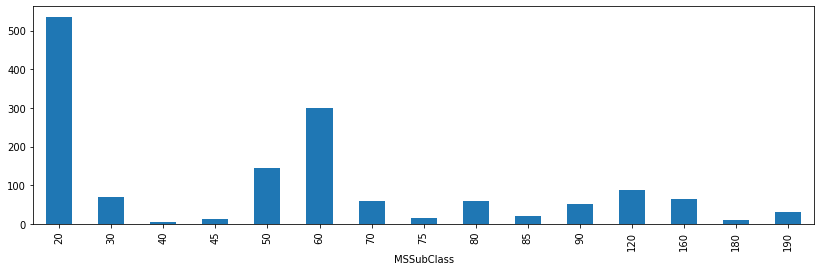

In [7]:
df.groupby(['MSSubClass']).Id.count().plot(kind='bar',figsize=(14,4))

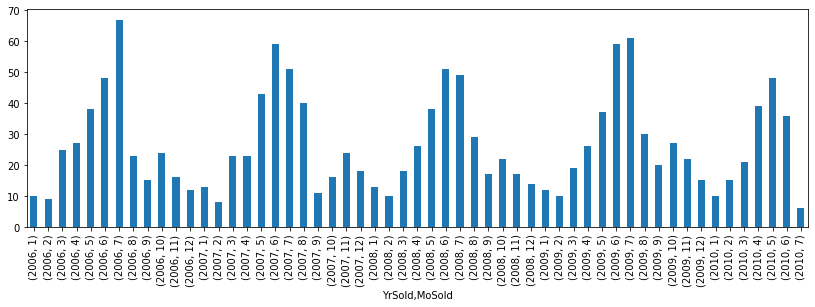

In [8]:
df.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar',figsize=(14,4))

**From the above graph, we see that if SalePrice amount is less then more people are interested in buying the house**

**converting the 'Yrsold','MSSubClass','MoSold' to object data type**

In [9]:
df['YrSold']=df['YrSold'].astype(object)
df['MSSubClass']=df['MSSubClass'].astype(object)
df['MoSold']=df['MoSold'].astype(object)

**Again splitting the table numaerical and categorical**

In [10]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data=df.select_dtypes(exclude=[np.number])
print('there are {0} numerical and{1} categorical in the data set'. 
      format(numeric_data.shape[1],categorical_data.shape[1]))

there are 35 numerical and42 categorical in the data set


**checking the null values**

In [11]:
numeric_data.isnull().sum()

Id                 0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

**checking the information of the numeric_data**

In [12]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
Id               1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

**filling the Null values column with mean**

In [13]:
numeric_data['LotFrontage']=numeric_data.LotFrontage.fillna(numeric_data.LotFrontage.mean())

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
numeric_data['MasVnrArea']=numeric_data.MasVnrArea.fillna(numeric_data.MasVnrArea.mean())

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
numeric_data['GarageYrBlt']=numeric_data.GarageYrBlt.fillna(numeric_data.GarageYrBlt.mean())

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
numeric_data.shape

(1460, 35)

**removing the target variable in numeric_data**

In [17]:
numeric_data=numeric_data.drop('SalePrice',axis=1)
numeric_data.shape

(1460, 34)

**converting the 'GarageYrBlt','LotFrontage','MasVnrArea' to int datatype**

In [18]:
numeric_data['GarageYrBlt']=numeric_data['GarageYrBlt'].astype(int)
numeric_data['LotFrontage']=numeric_data['LotFrontage'].astype(int)
numeric_data['MasVnrArea']=numeric_data['MasVnrArea'].astype(int)

**checking the shape and null values in categorical**

In [19]:
categorical_data.shape

(1460, 42)

In [20]:
categorical_data.isna().sum()

MSSubClass         0
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
dtype: int64

**filling the null values through backward fill**

In [21]:
a_cat=categorical_data.fillna(method='bfill')

**filling the null values through forward fill**

In [22]:
a_cat=a_cat.fillna(method='ffill')

**checking unique values in each column**

In [23]:
a_cat['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [24]:
a_cat['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [25]:
a_cat['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

**converting the data type of Int into Object**

In [26]:
a_cat['YrSold']=a_cat['YrSold'].astype(object)
a_cat['MoSold']=a_cat['MoSold'].astype(object)
a_cat['MSSubClass']=a_cat['MSSubClass'].astype(object)

**importing the libraries of label and onehot encoder**

In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()

**converting categorical to numerical using label encoder**

In [28]:
for col in a_cat:
    if a_cat[col].dtypes=='object':
        a_cat[col]=le.fit_transform(a_cat[col])

In [29]:
a_cat.shape

(1460, 42)

In [30]:
a_cat.columns #2,5,28(only having [0,1])[names:street,utilities,centralAir]

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()


In [32]:
a_cat.shape

(1460, 42)

**converting the dataFrame into array**

In [33]:
a_cat_array=a_cat.iloc[:,0:42].values
a_cat_array

array([[5, 3, 1, ..., 2, 8, 4],
       [0, 3, 1, ..., 1, 8, 4],
       [5, 3, 1, ..., 2, 8, 4],
       ...,
       [6, 3, 1, ..., 4, 8, 4],
       [0, 3, 1, ..., 4, 8, 4],
       [0, 3, 1, ..., 2, 8, 4]])

In [34]:
cols=[0,1,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,41]


**transforming into onehotencoder**

In [35]:
a_cat_onehot1=one.fit_transform(a_cat_array[:,cols])
a_cat_onehot1.shape

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(1460, 265)

**converting series into DataFrame**

In [36]:
a_cat_onehot1_table=pd.DataFrame(data=a_cat_onehot1.toarray())
a_cat_onehot1_table.shape

(1460, 265)

**joining the two data frames with pd.concat**

In [37]:
complete_table=pd.concat([numeric_data,a_cat_onehot1_table],axis=1)
complete_table.shape

(1460, 299)

In [38]:
X_train=complete_table
Y_train=df['SalePrice']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=1,shuffle=True)

In [40]:
x_train.shape,x_test.shape

((1022, 299), (438, 299))

### Fitting x_train,y_train in Decision Tree model

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [42]:
pred=dt.predict(x_test)

In [43]:
dt.score(x_test,y_test)

0.8239481488129529

In [ ]:
dt.feature_importances_

In [45]:
df_withoutliers=pd.DataFrame({'actual':y_test,'predicted':pred})

In [46]:
df_withoutliers['diff'] = abs(df_withoutliers['actual'] - df_withoutliers['predicted']) 
df_withoutliers['mape'] = df_withoutliers['diff']/df_withoutliers['actual']           

In [47]:
df_withoutliers['ID']=df_withoutliers.index

   **checking the outliers in y_train by using boxplot**

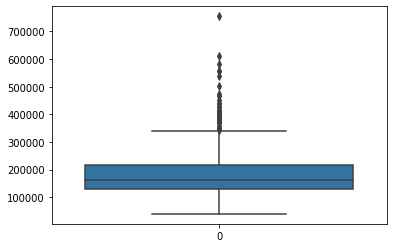

In [53]:
sns.boxplot(data=y_train)

**we observe outliers when salesprice is between 300,000 and 400,000. So I tried running box plots after removing values above certain thresholds, and it turns out that the threshold is 299000**

### removing the ouliers 

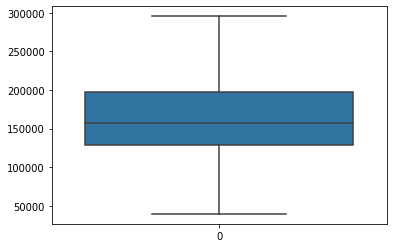

In [54]:
y_train[y_train<299000]
sns.boxplot(data=y_train[y_train<299000])
plt.show()

**removing outliers in x_train,y_train**

In [55]:
x_train=x_train[y_train<299000]
x_train.shape

(945, 299)

In [56]:
y_train=y_train[y_train<299000]
y_train.shape

(945,)

### Fitting x_train,y_train in Decision Tree model

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor()
dt1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [58]:
predict=dt1.predict(x_test)

### Accuracy score of the model without outliers

In [59]:
dt1.score(x_test,y_test)

0.6199796717081403

### Accuracy score of the model with outliers

In [60]:
dt.score(x_test,y_test)

0.8239481488129529

In [ ]:
dt.feature_importances_
# checking feature importance in the model with outliers

In [ ]:
dt1.feature_importances_ 
# checking feature importance in the model without outliers

**I compared the feature_importance of both the columns of WITH and WITHOUT outliers of the data in the excel 'finalresult(17E).csv'**

In [61]:
difference=pd.read_csv('finalresult(17E).csv')
difference.head()

,features,with,without,b-c,abs(b-c),ColumnNames,difference
0,col4,0.625336,0.473924,0.151413,0.151413,'OverallQual',15.0
1,col27,0.013806,0.075678,-0.061872,0.061872,'GarageArea',6.0
2,col16,0.088142,0.145057,-0.056915,0.056915,'GrLivArea',5.0
3,col12,0.027648,0.073451,-0.045803,0.045803,'TotalBsmtSF',4.0
4,col14,0.029713,0.002370,0.027343,0.027343,'2ndFlrSF',2.0


**From the table, we see the maximum difference in OverallQuality column and the difference is 15%**

In [48]:
x_train['OverallQual'].value_counts() #with outliers data

6     276
5     265
7     233
8     115
4      75
9      28
3      15
10     13
2       1
1       1
Name: OverallQual, dtype: int64

In [62]:
x_train['OverallQual'].value_counts()   #without outliers data

6     276
5     265
7     222
8      84
4      75
3      15
9       4
10      2
2       1
1       1
Name: OverallQual, dtype: int64

#### After removing outliers 
<br>7-11 
<br>8-31
<br>9-24
<br>10-11
<br>these counts are gone in the ouliers

In [63]:
x_test['OverallQual'].value_counts()

5     132
6      98
7      86
8      53
4      41
9      15
10      5
3       5
2       2
1       1
Name: OverallQual, dtype: int64

**By checking the 'OverallQual' column in x_train and x_test** 

**Hypothesis:9,10 are mostly missing in x_train of without outliers data. That's why we are checking the record of 9 and 10 in 'OverallQual' column**

In [49]:
x_test[x_test['OverallQual']>8]

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,255,256,257,258,259,260,261,262,263,264
53,54,68,50271,9,5,1981,1987,0,1810,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
994,995,96,12456,10,5,2006,2007,230,1172,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
798,799,104,13518,9,5,2008,2009,860,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
309,310,90,12378,9,5,2003,2004,0,1274,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1373,1374,70,11400,10,5,2001,2002,705,1282,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
644,645,85,9187,9,5,2009,2009,162,1121,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1169,1170,118,35760,10,5,1995,1996,1378,1387,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1228,1229,65,8769,9,5,2008,2008,766,1540,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,886,50,5119,9,5,1999,2000,60,1238,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1182,1183,160,15623,10,5,1996,1996,0,2096,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### WITHOUT OUTLIERS DATA 

In [64]:
df1_without_outliers=pd.DataFrame({'actual':y_test,'predicted':predict})
df1_without_outliers.shape

(438, 2)

In [65]:
df1_without_outliers['diff'] = abs(df1_without_outliers['actual'] - df1_without_outliers['predicted']) 
df1_without_outliers['mape'] = df1_without_outliers['diff']/df1_without_outliers['actual']

In [66]:
df1_without_outliers['ID']=df1_without_outliers.index

In [67]:
df_without_outliers_OveralQualityof9and10=df1_without_outliers[df1_without_outliers['ID'].isin([53,994,798,309,1373,644,1169,1228,885,1182,1036,481,724,58,765,336,350,527,1267,1338])]

In [68]:
df_without_outliers_removed9and10=df1_without_outliers.drop([53,994,798,309,1373,644,1169,1228,885,1182,1036,481,724,58,765,336,350,527,1267,1338])
df_without_outliers_removed9and10.shape

(418, 5)

### WITH OUTLIERS DATA 

In [51]:
df_withoutliers_overallquality9and10=df_withoutliers[df_withoutliers['ID'].isin([53,994,798,309,1373,644,1169,1228,885,1182,1036,481,724,58,765,336,350,527,1267,1338])] #overall quality

In [52]:
df_withoutliers_removing9and10 = df_withoutliers.drop([53,994,798,309,1373,644,1169,1228,885,1182,1036,481,724,58,765,336,350,527,1267,1338])

### we are comparing the data of WITH and WITHOUT OUTLIERS 

In [72]:
df_withoutliers['mape'].describe()   #total data

count    438.000000
mean       0.154395
std        0.199254
min        0.000000
25%        0.044617
50%        0.107007
75%        0.206613
max        2.237822
Name: mape, dtype: float64

In [73]:
df1_without_outliers['mape'].describe()  #total data

count    438.000000
mean       0.163182
std        0.200678
min        0.000000
25%        0.049939
50%        0.111877
75%        0.220007
max        2.237822
Name: mape, dtype: float64

In [75]:
df_withoutliers_removing9and10['mape'].describe()   #REMOVING THE DATA OF 9,10

count    418.000000
mean       0.155799
std        0.202866
min        0.000000
25%        0.045458
50%        0.106506
75%        0.210069
max        2.237822
Name: mape, dtype: float64

In [74]:
df_without_outliers_removed9and10['mape'].describe()   #REMOVING THE DATA OF 9,10

count    418.000000
mean       0.154614
std        0.197462
min        0.000000
25%        0.047968
50%        0.105353
75%        0.213457
max        2.237822
Name: mape, dtype: float64

In [76]:
df_withoutliers_overallquality9and10['mape'].describe() #ONLY THE DATA OF 9,10

count    20.000000
mean      0.125056
std       0.094689
min       0.003215
25%       0.038368
50%       0.133635
75%       0.185311
max       0.328531
Name: mape, dtype: float64

In [77]:
df_without_outliers_OveralQualityof9and10['mape'].describe() #ONLY THE DATA OF 9,10

count    20.000000
mean      0.342246
std       0.187429
min       0.096672
25%       0.194940
50%       0.344248
75%       0.451448
max       0.696907
Name: mape, dtype: float64

**By checking 9 and 10 in OverallQual column we are getting huge difference in 25%,50%,75% in the mean absolute percentage error[mape] shown above**